# 0.0 Importações

In [1]:
import math
import datetime 
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import pandas            as pd
import seaborn           as sns
from IPython.core.display import HTML
from IPython.display import Image

## 0.1. Funções Auxiliares

In [2]:
def load_csv(path):
    ''' Função utilizada para carregamento dos dados'''
    df = pd.read_csv(path, low_memory=False)
    return df

def show_dimensions(df):
    ''' Função utilizada para obter as dimensões dos dados'''
    print(f"Number of Rows:    {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")
    print(f"Shape:             {df.shape}")
    return None

def show_data_types(df):
    ''' Função utilizada para obter os tipos dos dados'''
    print(df.dtypes)
    return None

def check_na(df):
    ''' Função utilizada para visualizar dados ausentes ou NaN'''
    print(df.isna().sum())
    return None

def remove_space_column_name(df):
    ''' Função utilizada para remover espaços desnecessários nos nomes das colunas'''
    # Remover espaços desnecessários
    old_columns = df.columns
    remove_space = lambda x: x.strip()
    new_cols = list(map(remove_space, old_columns))
    # Renomear as colunas
    df.columns = new_cols
    return df

def remove_dollar_sign(df):
    ''' Função utlizada para remover símbolo de cifrão da coluna Income'''
    df.Income = df.Income.str.replace('$','')
    return df

def remove_end_space(df):
    ''' Função utilizada para remover espaço no final das strings presentes na coluna Income'''
    df.Income = df.Income.str.replace(' ','')
    return df

def remove_comma(df):
    ''' Função utilizada para remover vírgula nos dados da coluna Income'''
    df.Income = df.Income.str.replace(',','')
    return df
    
def rename_data_country(df):
    ''' Função utilizada para renomear os dados da coluna Country'''
    country_map = {'SP' : 'Spain', 'CA' : 'Canada', 'US' : 'United States', 'AUS' : 'Australia', 'GER' : 'Germany', 'IND' : 'India', 'SA' : 'Saudi Arabia', 'ME' : 'Montenegro'}
    df['Country'] = df['Country'].map(country_map)
    return df

def clean_data(df):
    ''' Função utilizada para realizar a limpeza nos dados'''
    # Primeira etapa da limpeza 
    df_step1 = remove_space_column_name(df)

    # Segunda etapa da limpeza
    df_step2 = remove_dollar_sign(df)
    
    # Terceira etapa da limpeza
    df_step3 = remove_end_space(df)

    # Quarta etapa da limpeza 
    df_step4 = remove_comma(df)

    # Quinta etapa da limpeza
    df_step5 = rename_data_country(df)

    return df_step5

def show_descriptive_statistical(df):
    ''' Função utilizada para exibir informações de estatística descritiva'''
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(df.apply(np.mean)).T
    ct2 = pd.DataFrame(df.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(df.apply(np.std)).T
    d2 = pd.DataFrame(df.apply(min)).T
    d3 = pd.DataFrame(df.apply(max)).T
    d4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(df.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T

    df_descriptive = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    df_descriptive.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    return df_descriptive

def draw_scatterplot(list_feature,df,y):
    ''' Função utilizada para gerar scatterplots'''
    suptitle = 'Gráficos de Dispersão - '+str(y)
    fig, ax = plt.subplots(int(len(list_feature)/2),2, figsize=(20,40))
    colunas = list_feature
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i] = sns.scatterplot(data=df, x=colunas[indice],y=y,ax=ax[j][i])
            indice += 1
    fig.suptitle(suptitle, position=(.5,1), fontsize=22)
    fig.tight_layout(pad=5)
    return
    
def draw_histplot(num_variables):
    ''' Função utilizada para gerar histogramas'''
    fig, ax = plt.subplots(int(len(num_variables.columns)/2),2, figsize=(15,15))
    colunas = num_variables.columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i] = sns.histplot(data=num_variables[colunas[indice]],ax=ax[j][i])
            indice += 1
    fig.suptitle('Histogramas', position=(.5,1), fontsize=22)
    fig.tight_layout(pad=5)
    return

def plot_kde(num_attributes,df):
    ''' Função utilizada para gerar kdeplots'''
    fig, ax = plt.subplots(int(len(num_attributes)/2),2, figsize=(18,30))
    colunas = num_attributes
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i] = sns.kdeplot(x=df[colunas[indice]], ax=ax[j][i],shade=True,hue=df.Response)
            indice += 1
    fig.suptitle('KDE Plots', position=(.5,1), fontsize=20)
    fig.tight_layout(pad=5)
    return

def plot_boxplot(num_attributes,df):
    ''' Função utilizada para gerar boxplots'''
    fig, ax = plt.subplots(int(len(num_attributes)/2),2, figsize=(20,50))
    colunas = num_attributes
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=12)
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.boxplot(data=df, ax=ax[j][i], x=df['Response'], y=df[colunas[indice]])
            indice += 1
    fig.suptitle('Boxplots', position=(.5,1), fontsize=20)
    fig.tight_layout(pad=5)
    return

def categorical_distribution_plot(df,category):
    ''' Função utilizada para gerar gráficos de distribuição de dados para variáveis categóricas'''
    fig, _ = plt.subplots(1,2, figsize=(20,5))
    fig.suptitle('Distribuição de Dados', position=(.50,1), fontsize=15)
    fig.tight_layout(pad=3)
    plt.subplot(1, 2, 1)
    sns.histplot(df[category])
    plt.subplot(1, 2, 2)
    sns.barplot(data=df,x=df.groupby([category]).Response.mean().sort_values(ascending=False).index,y=df.groupby([category]).Response.mean().sort_values(ascending=False).values)
    plt.ylabel('Percentual')
    plt.show()
    return

def create_weekday_column(df):
    ''' Função utilizada para criar a coluna Weekday, referente ao dia da semana em que o cliente se vinculou à empresa'''
    weekday_map = {0: 'Segunda-Feira', 1: 'Terça-Feira', 2: 'Quarta-Feira', 3: 'Quinta-Feira', 4: 'Sexta-Feira', 5: 'Sábado', 6: 'Domingo'}
    df['Weekday'] = df['Dt_Customer'].dt.weekday.map(weekday_map)
    return df

def create_month_column(df):
    ''' Função utilizada para criar a coluna Month, referente ao mês em que o cliente se vinculou à empresa'''
    month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    df['Month'] = df['Dt_Customer'].dt.month.map(month_map)
    return df

def create_year_column(df):
    ''' Função utilizada para criar a coluna Year, referente ao ano em que o cliente se vinculou à empresa'''
    df['Year'] = df['Dt_Customer'].dt.year
    return df

def create_age_column(df):
    ''' Função utilizada para criar a coluna Age, referente à idade do cliente'''
    ano_atual = datetime.datetime.today().year
    df['Age'] = ano_atual - df['Year_Birth']
    return df

def create_continent_column(df):
    ''' Função utilizada para criar a coluna Continent, referente ao continente do cliente'''
    continent_map = {'Spain': 'Europe', 'Canada': 'North-America', 'United States': 'North-America', 'Australia': 'Oceania', 'Germany': 'Europe', 'India': 'Saudi Arabia', 'Montenegro': 'Europe'}
    df['Continent'] = df['Country'].map(continent_map)
    return df

def jupyter_settings():
    ''' Função utilizada para configurar o notebook'''
    %matplotlib inline
    #%pylab inline
    
    #plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['font.size'] = 24
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['font.family'] = 'Arial'
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    return

In [3]:
# Configurando o notebook
jupyter_settings()

## 0.2. Definição do Caminho


In [4]:
path = './data\marketing_data.csv'

## 0.3. Carregamento dos Dados

In [5]:
data = load_csv(path)

# 1.0. DESCRIÇÃO DOS DADOS

**Data Fields**

* **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise;
* **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise;
* **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise;
* **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise;
* **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise;
* **Response** (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise;
* **Complain** - 1 if customer complained in the last 2 years;
* **DtCustomer** - date of customer’s enrolment with the company;
* **Education** - customer’s level of education;
* **Marital** - customer’s marital status;
* **Kidhome** - number of small children in customer’s household;
* **Teenhome** - number of teenagers in customer’s household;
* **Income** - customer’s yearly household income;
* **MntFishProducts** - amount spent on fish products in the last 2 years;
* **MntMeatProducts** - amount spent on meat products in the last 2 years;
* **MntFruits** - amount spent on fruits products in the last 2 years;
* **MntSweetProducts** - amount spent on sweet products in the last 2 years;
* **MntWines** - amount spent on wine products in the last 2 years;
* **MntGoldProds** - amount spent on gold products in the last 2 years;
* **NumDealsPurchases** - number of purchases made with discount;
* **NumCatalogPurchases** - number of purchases made using catalogue;
* **NumStorePurchases** - number of purchases made directly in stores;
* **NumWebPurchases** - number of purchases made through company’s web site;
* **NumWebVisitsMonth** - number of visits to company’s web site in the last month;
* **Recency** - number of days since the last purchase.

## 1.1 Dimensões dos Dados

In [6]:
show_dimensions(data)

Number of Rows:    2240
Number of Columns: 28
Shape:             (2240, 28)


## 1.2 Tipos dos Dados

In [7]:
show_data_types(data)

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object


## 1.3 Checar NaN

In [8]:
check_na(data)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


## 1.4 Limpeza de Dados

In [9]:
data = clean_data(data)

C:\Users\gusta\AppData\Local\Temp\ipykernel_10980\3825204617.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Income = df.Income.str.replace('$','')


## 1.5 Mudança de Tipo

In [10]:
data.Income = data.Income.astype('float')
data.Dt_Customer = data.Dt_Customer.astype('datetime64[ns]')

## 1.6 Criação de Novas Colunas

In [11]:
data = create_weekday_column(data)
data = create_month_column(data)
data = create_year_column(data)
data = create_age_column(data)
data = create_continent_column(data)

## 1.7 Estatística Descritiva

In [12]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
cat_attributes = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Atributos Numéricos

In [13]:
show_descriptive_statistical(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,ID,0.0,11191.0,11191.0,5592.159821,5458.5,3245.937415,0.039832,-1.190028
1,Year_Birth,1893.0,1996.0,103.0,1968.805804,1970.0,11.981394,-0.349944,0.717464
2,Income,1730.0,666666.0,664936.0,52247.251354,NaN,25167.396174,6.763487,159.636700
3,Kidhome,0.0,2.0,2.0,0.444196,0.0,0.538278,0.635288,-0.779661
4,Teenhome,0.0,2.0,2.0,0.506250,0.0,0.544417,0.407115,-0.986235
5,Recency,0.0,99.0,99.0,49.109375,49.0,28.955987,-0.001987,-1.201897
6,MntWines,0.0,1493.0,1493.0,303.935714,173.5,336.522251,1.175771,0.598744
7,MntFruits,0.0,199.0,199.0,26.302232,8.0,39.764555,2.102063,4.050976
8,MntMeatProducts,0.0,1725.0,1725.0,166.950000,67.0,225.664984,2.083233,5.516724
9,MntFishProducts,0.0,259.0,259.0,37.525446,12.0,54.616784,1.919769,3.096461


### 1.7.2 Atributos Categóricos

In [14]:
# Verificar a quantidade de itens únicos em cada variável categórica
cat_attributes.apply(lambda x: x.unique().shape[0])

Education          5
Marital_Status     8
Country            8
Weekday            7
Month             12
Continent          5
dtype: int64

## 2. Mapa Mental de Hipóteses

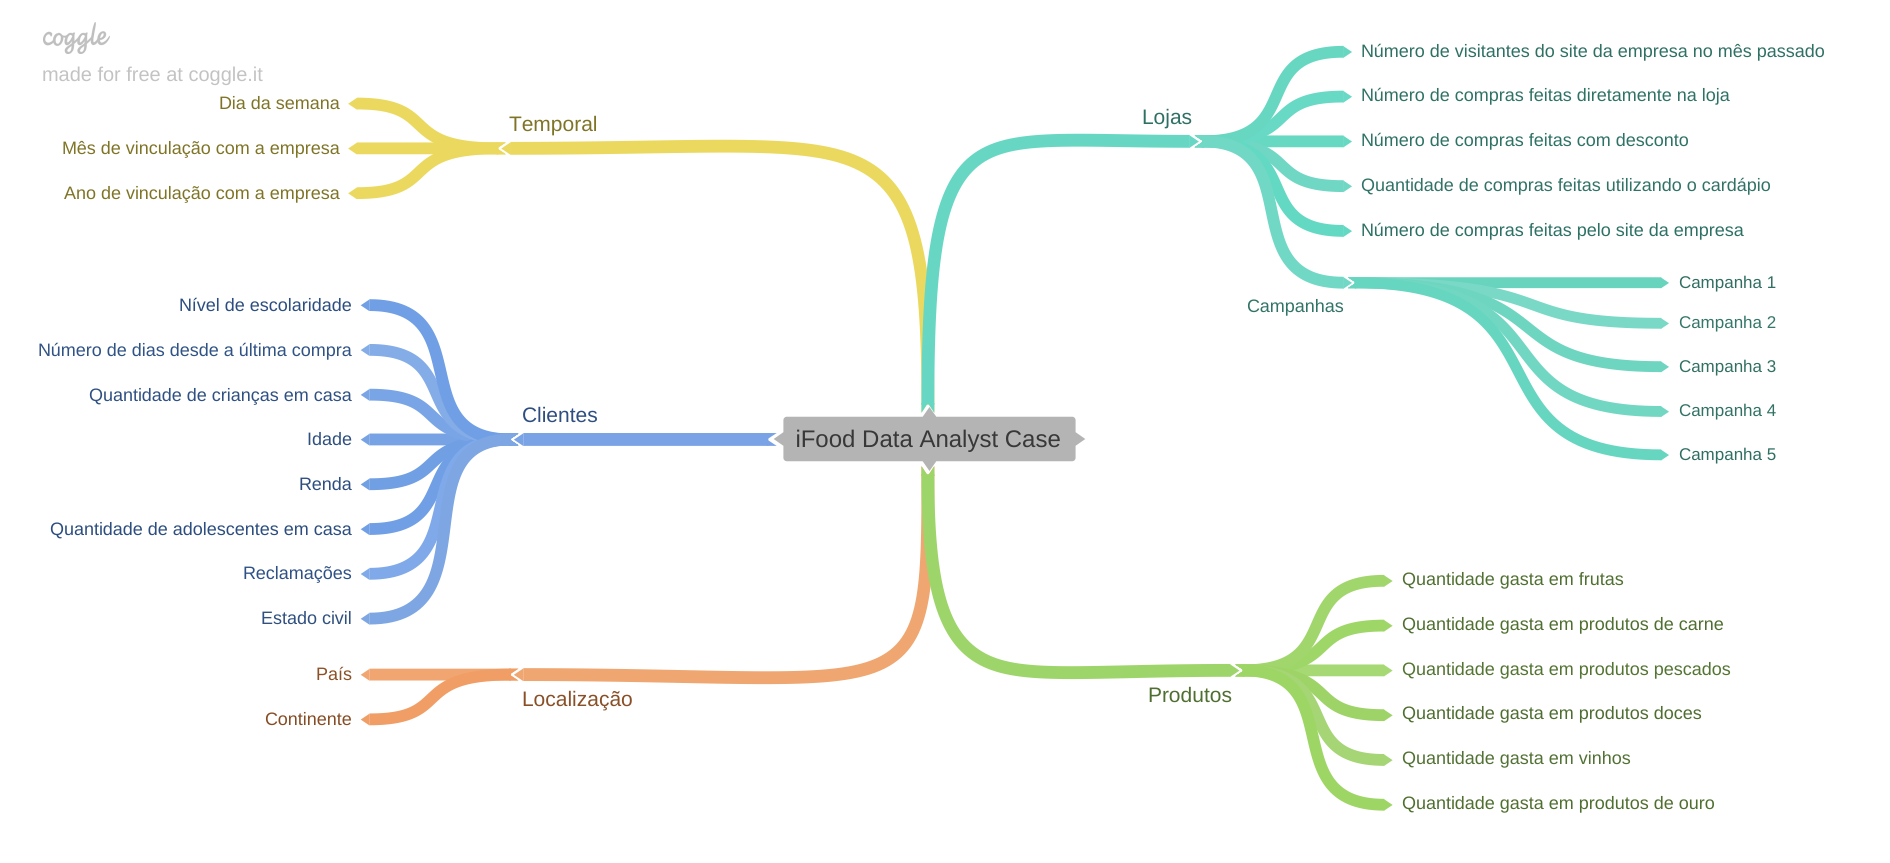

In [15]:
Image('images\iFood_Data_Analyst_Case_hypotesis.png')

### 2.1 Criação de Hipóteses

#### 2.1.1 Hipóteses Clientes

* O nível de escolaridade influencia na adesão a última campanha?
* Clientes com o menor número de dias desde a última compra do cliente deveriam ser mais aceptíveis à última campanha;
* Ter mais crianças em casa influencia na receptividade à última campanha?
* A idade do cliente influencia na receptividade à última campanha?
* A renda do cliente influencia na aceptibilidade à última campanha?
* Ter mais adolescentes em casa influencia na aceptibilidade à ultima campanha?
* Clientes com reclamações aderem menos a última campanha do que clientes sem reclamações?
* O estado civil influencia na aceptibilidade à última campanha?

#### 2.1.2 Hipóteses Temporais

* O dia da semana que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?
* O mês que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?
* O ano que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?

#### 2.1.3 Hipóteses Lojas

* O número de visitantes no site da empresa no mês passado influencia a adesão à última campanha?
* O número de compras feitas diretamente na loja influencia a adesão à última campanha?
* O número de compras feitas com desconto influencia a adesão à última campanha?
* A quantidade de compras feitas utilizando o cardápio influencia a adesão à última campanha?
* A adesão à campanha 1 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 2 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 3 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 4 deveria impactar o aumento na adesão à última campanha; 
* A adesão à campanha 5 deveria impactar o aumento na adesão à última campanha; 

#### 2.1.4 Hipóteses Localização
* Algum dos países teve melhor receptibilidade à última campanha do que os demais?
* Algum continente teve melhor receptibilidade à última campanha do que os demais?

#### 2.1.5 Hipóteses Produtos
* A quantidade gasta em frutas influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos de carne influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos pescados influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos doces influencia na aceptibilidade à última campanha?
* A quantidade gasta em vinhos influencia na aceptibilidade à última campanha?
* A quantidade gasta em produtos de ouro influencia na aceptibilidade à última campanha?

## 3. Análise Exploratória dos Dados

### 3.1 Análise Univariada dos Dados

#### 3.1.1 Variável Response

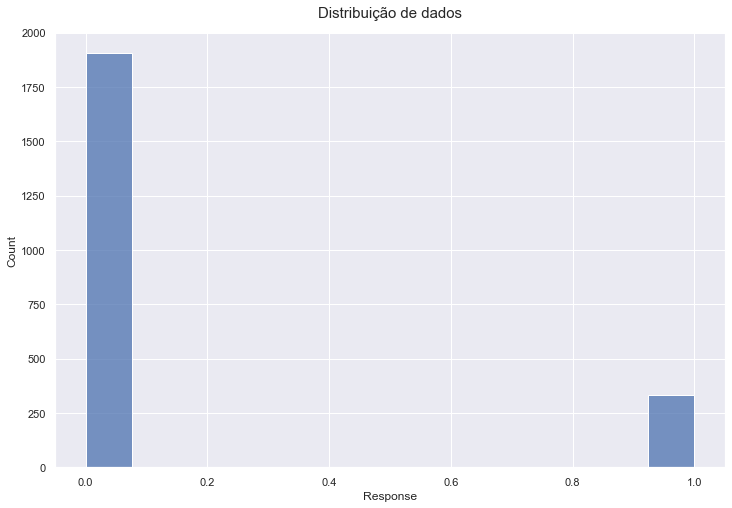

In [16]:
sns.histplot(data['Response'])
plt.title('Distribuição de dados',size=15,pad=15);

Notamos que apenas 334 pessoas o equivalente a 14,91% dos consumidores aceitaram a oferta na última campanha. 

#### 3.1.2 Variáveis Numéricas

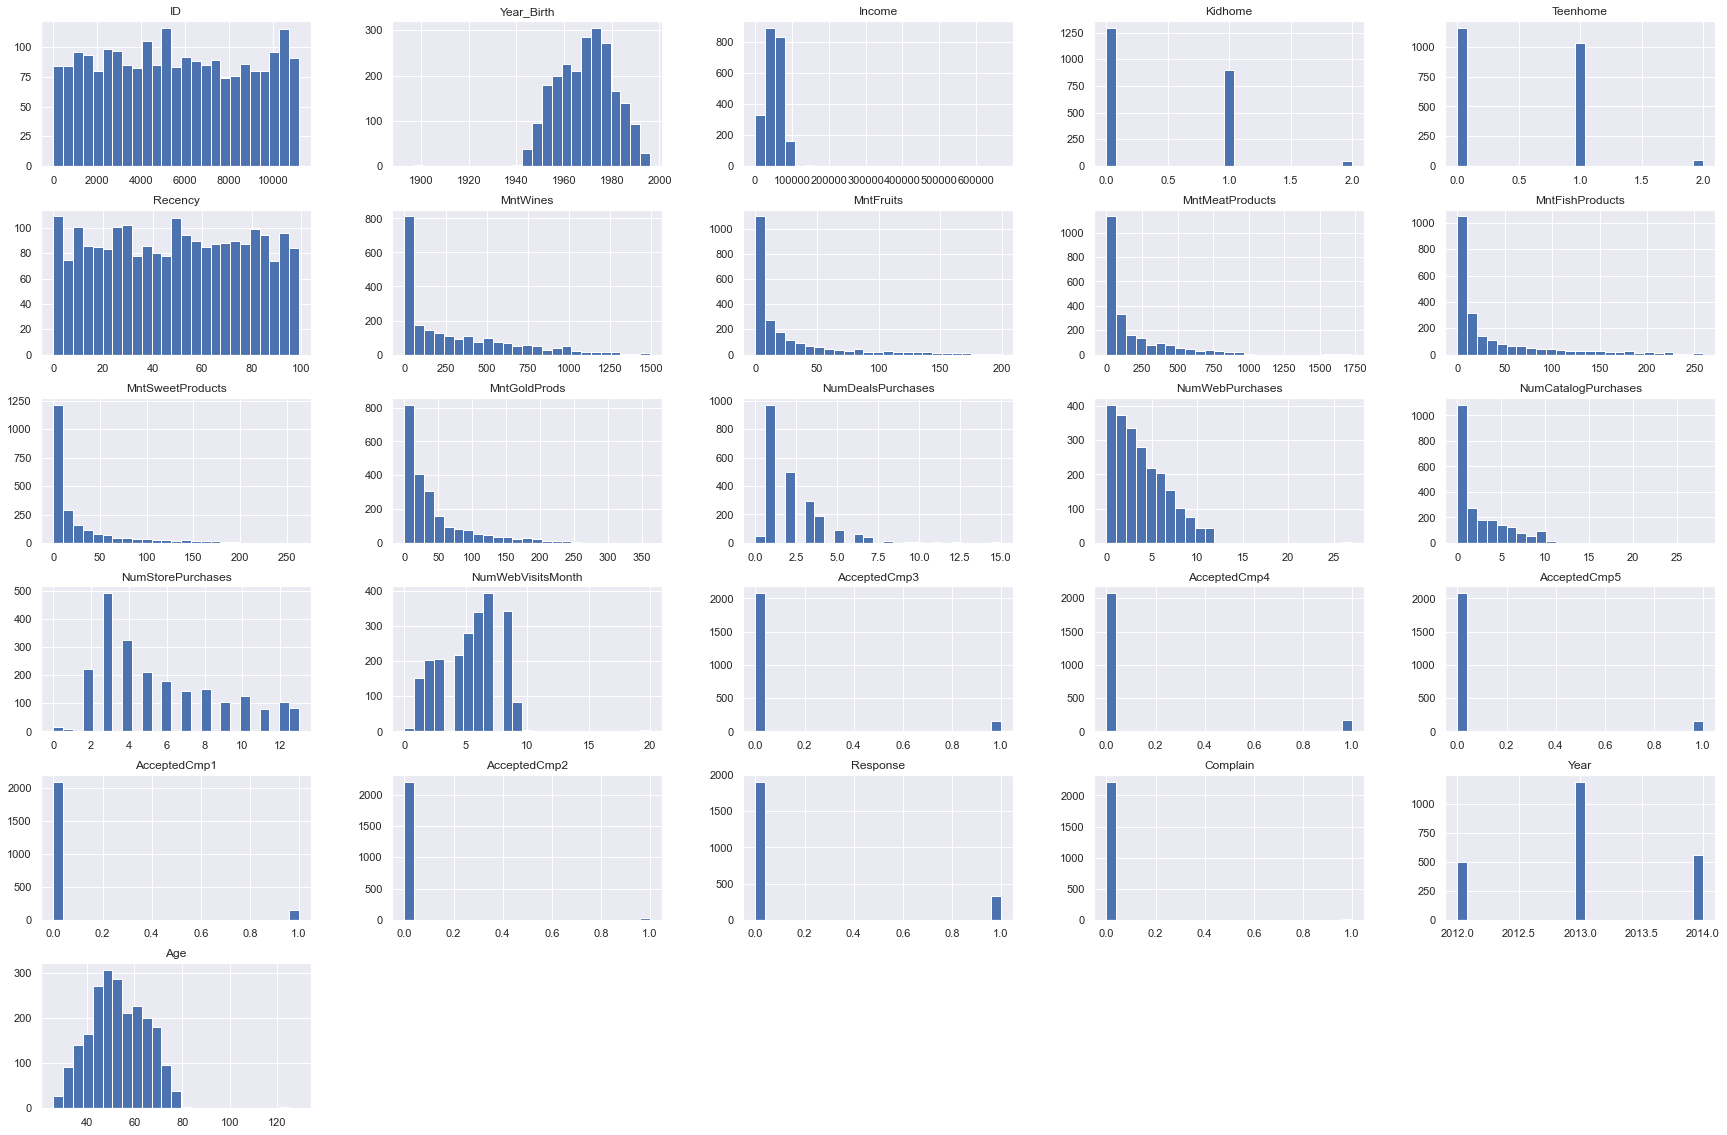

In [17]:
num_attributes.hist(figsize=(30,20), bins=25);

### 3.2 Correlação

O coeficiente de correlação de Pearson avalia o grau e a direção da correlação linear entre duas variáveis. Deste modo, quanto mais próximos de 1 ou -1, maior a intensidade da correlação, o sinal indica apenas a direção (positivamente correlacionados ou negativamente correlacionados). Deve-se mencionar também que quanto mais próximo de 0 menor a força da correlação.

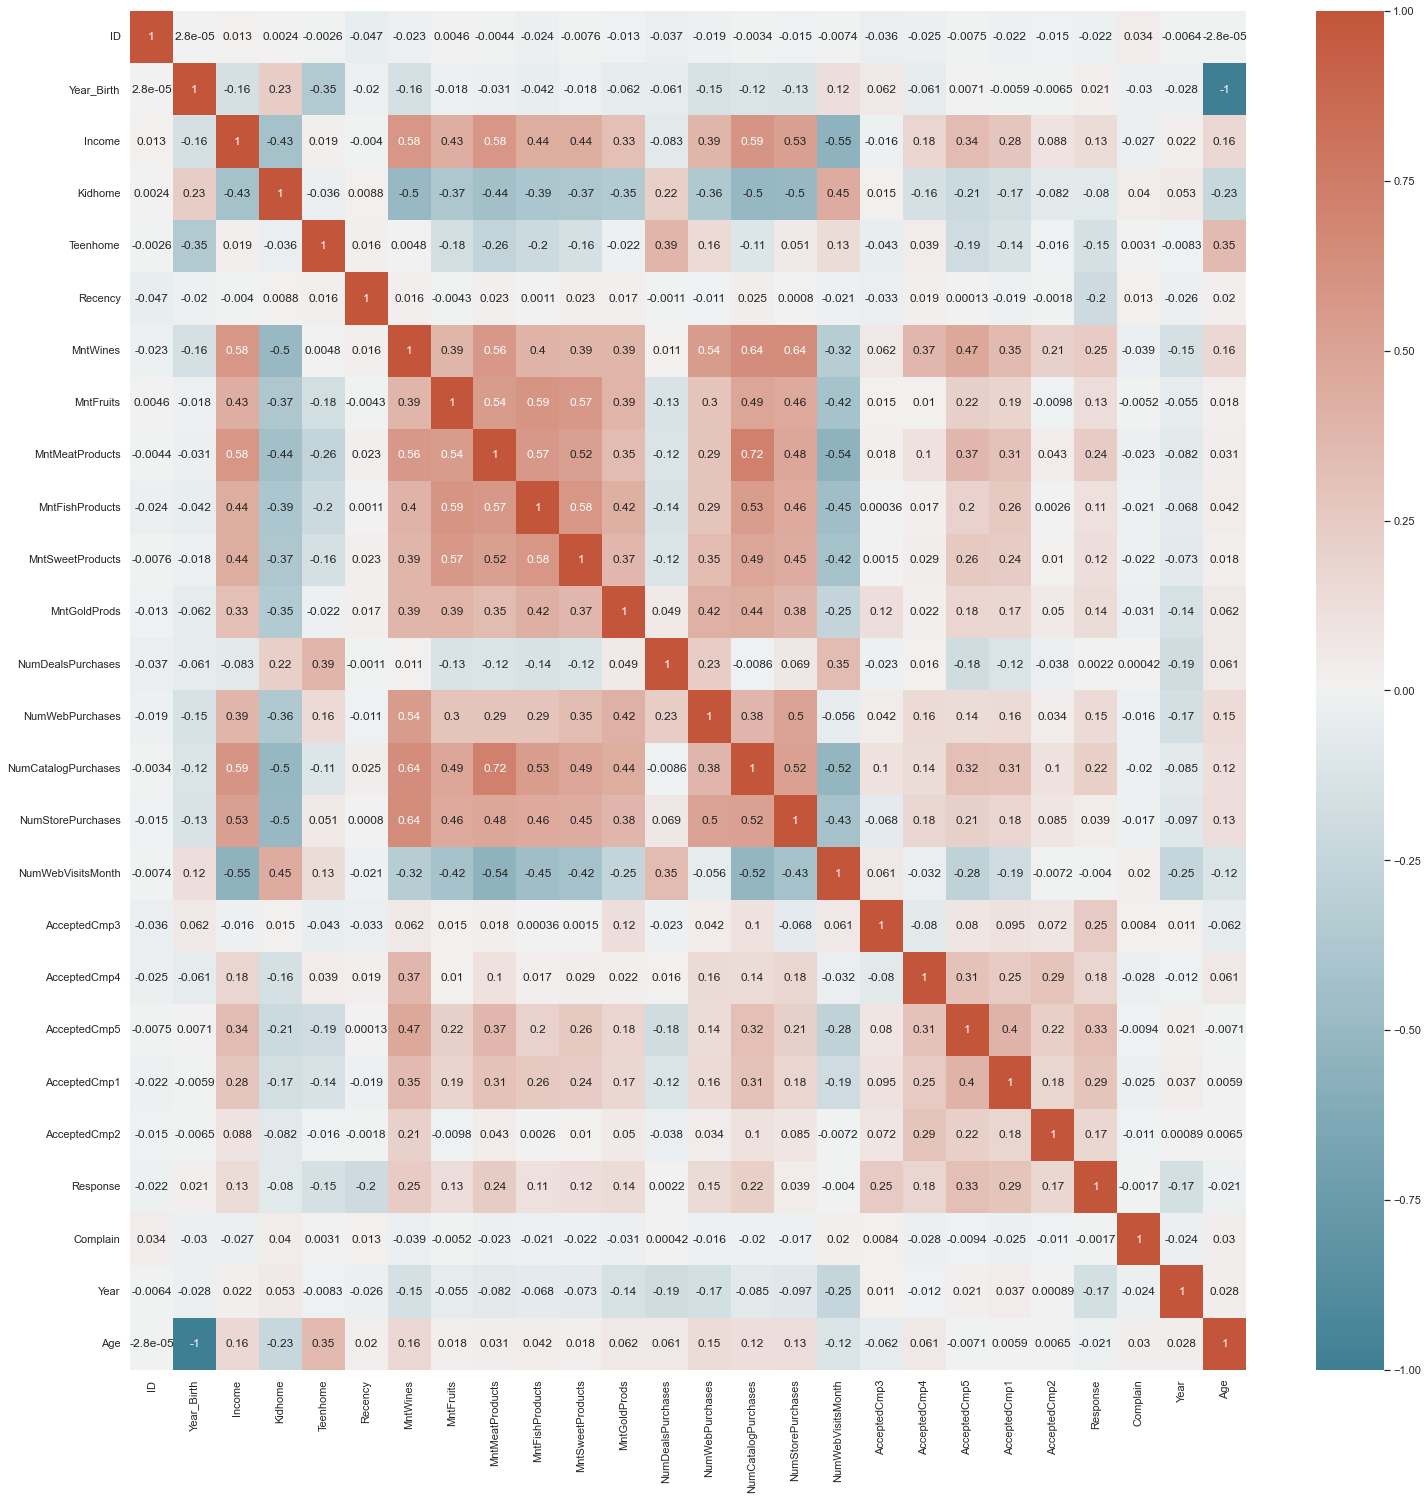

In [18]:
plt.figure(figsize=(25,25))
corr_data = data.corr()
sns.heatmap(corr_data,xticklabels=corr_data.columns,yticklabels=corr_data.columns,annot=True,cmap=sns.diverging_palette(220,20, as_cmap=True));

Podemos identificar que as variáveis que apresentaram maior correlação linear com a variável `Response` foram: `AcceptedCmp1`, `AcceptedCmp5`, `AcceptedCmp3` e `MntWines`. Dessa forma, interpretamos que altos valores de `Response` são acompanhados por altos valores destas variáveis: `AcceptedCmp1`, `AcceptedCmp5`, `AcceptedCmp3` e `MntWines`. Isso pois as correlações entre a variável `Response` e as demais variáveis mencionadas são positivas.
Além disso, deve-se destacar que altos valores de `Response` são acompanhados por baixos valores de `Recency`.



## 4. Avaliação de Hipóteses

### 4.1 Hipóteses Clientes

##### H1. O nível de escolaridade influencia na adesão a última campanha?

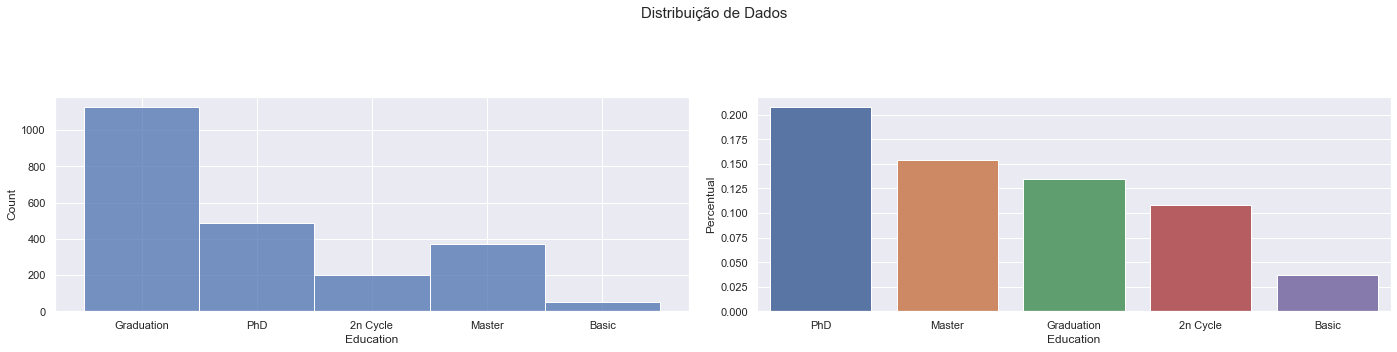

In [19]:
# Gráfico para visualizar a distribuição dos dados para a variável Education
categorical_distribution_plot(data,'Education')

No gráfico à esquerda, podemos notar o histograma da variável `Education` enquanto no gráfico à direita, notamos o percentual de consumidores que aceitaram a oferta na última campanha agrupadas por categoria (PhD, Master, Graduation, 2n Cycle e Basic). 

Verificamos que:
* 50,31% dos consumidores possuem Graduação;
* 21,70% dos consumidores possuem PhD;
* 16,52% dos consumidores possuem Mestrado.

Além disso:
* As categorias que apresentaram maior aceitabilidade à última campanha foram: PhD e Master;
* 20,78% dos consumidores que possuem PhD aceitaram à oferta na última campanha;
* 15,40% dos consumidores que possuem Mestrado aceitaram à oferta na última campanha;
* 13,49% dos consumidores que possuem Graduação aceitaram à oferta na última campanha.

##### H2. Clientes com o menor número de dias desde a última compra do cliente deveriam ser mais aceptíveis à última campanha;


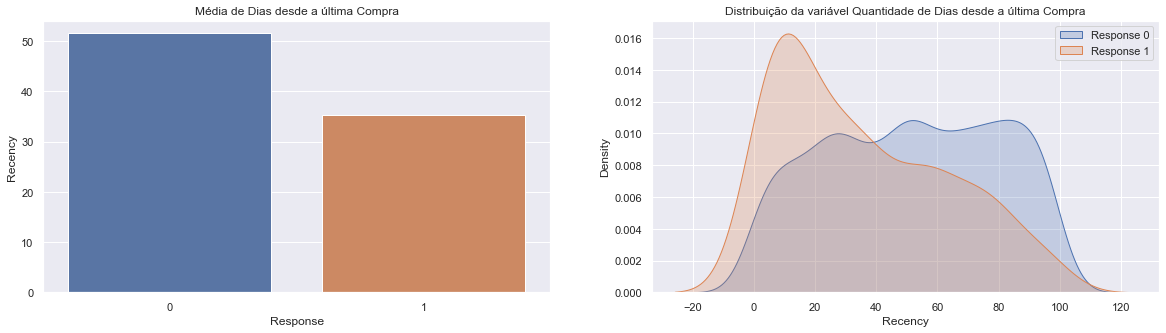

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').Recency.mean().index,y=data.groupby('Response').Recency.mean().values).set_title('Média de Dias desde a última Compra');
plt.ylabel('Recency');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].Recency,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].Recency,label='Response 1',shade=True);
plt.title('Distribuição da variável Quantidade de Dias desde a última Compra')
plt.legend();

No gráfico à esquerda, podemos notar a média de dias desde a última compra (`Recency`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `Recency`.

Verificamos que:
* Os consumidores que mais aceitaram a última campanha tiveram uma menor média de dias desde a última compra. Indicando que talvez uma das características dos clientes, mais propensos a aceitarem a última campanha, é a frequência na recorrência de compras.

##### H3. Ter mais crianças em casa influencia na receptividade à última campanha?


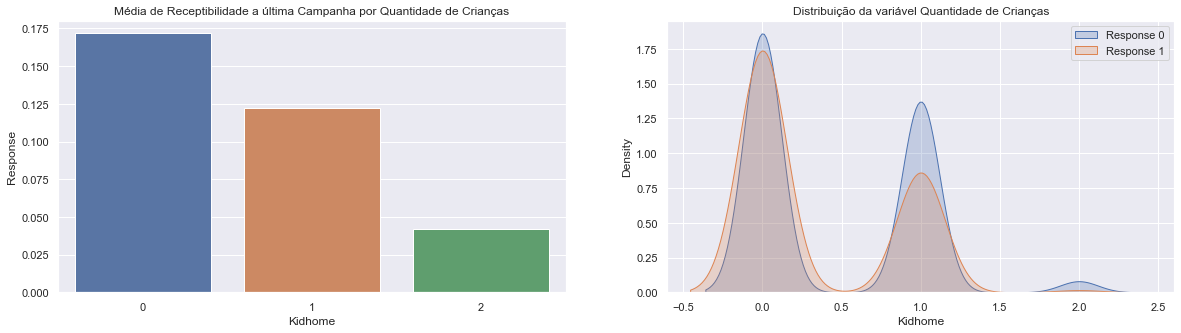

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Kidhome').Response.mean().index,y=data.groupby('Kidhome').Response.mean().values).set_title('Média de Receptibilidade a última Campanha por Quantidade de Crianças');
plt.ylabel('Response');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].Kidhome,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].Kidhome,label='Response 1',shade=True);
plt.title('Distribuição da variável Quantidade de Crianças')
plt.legend();

No gráfico à esquerda, podemos notar a média de receptibilidade da última campanha em função da quantidade de crianças. No gráfico à direita, notamos a distribuição para a variável `Kidhome`.

Verificamos que:
* Os consumidores que mais aceitaram a última campanha tinham menos crianças em casa.

##### H4. A idade do cliente influencia na receptividade à última campanha?


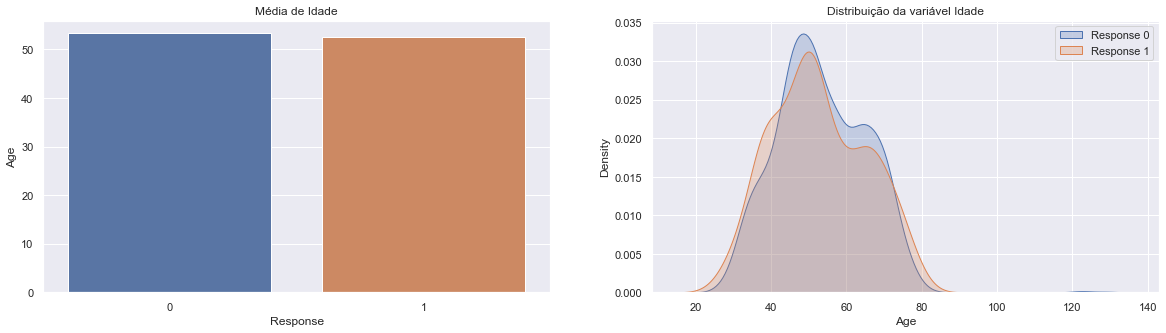

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').Age.mean().index,y=data.groupby('Response').Age.mean().values).set_title('Média de Idade');
plt.ylabel('Age');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].Age,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].Age,label='Response 1',shade=True);
plt.title('Distribuição da variável Idade')
plt.legend();

No gráfico à esquerda, podemos notar a média de idade em função da quantidade de crianças. No gráfico à direita, notamos a distribuição para a variável `Age`.

Verificamos que:
* A diferença entre a média de idade para os dois grupos (Response = 0 e Response = 1) foi bastante pequena, indicando que provavelmente este não seja um fator impactante em relação à receptividade à última campanha.

##### H5. A renda do cliente influencia na aceptibilidade à última campanha?


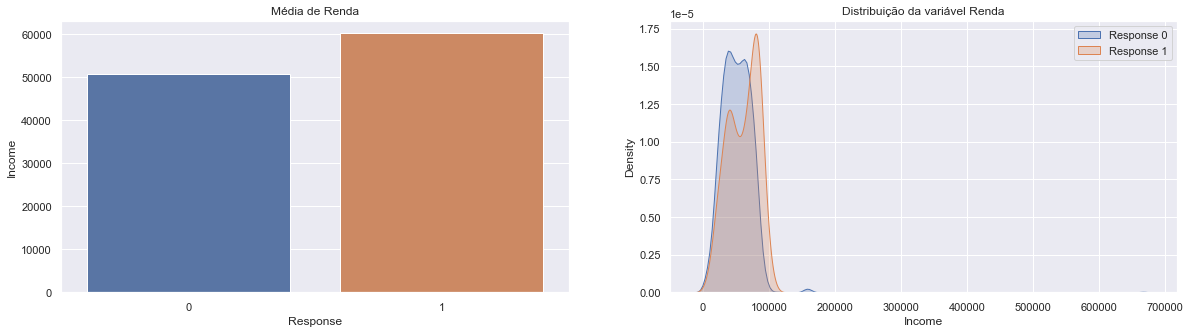

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').Income.mean().index,y=data.groupby('Response').Income.mean().values);
plt.title('Média de Renda');
plt.ylabel('Income');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].Income,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].Income,label='Response 1',shade=True);
plt.title('Distribuição da variável Renda')
plt.legend();

No gráfico à esquerda, podemos notar a média de renda em função dos grupos (Response = 0 e Response = 1). No gráfico à direita, notamos a distribuição para a variável `Income`.

Verificamos que:
* Notamos que o grupo que aceitou a última campanha teve maior renda que o outro grupo, indicando que provavelmente este possa ser um fator impactante em relação à receptividade à última campanha.

##### H6. Ter mais adolescentes em casa influencia na aceptibilidade à ultima campanha?


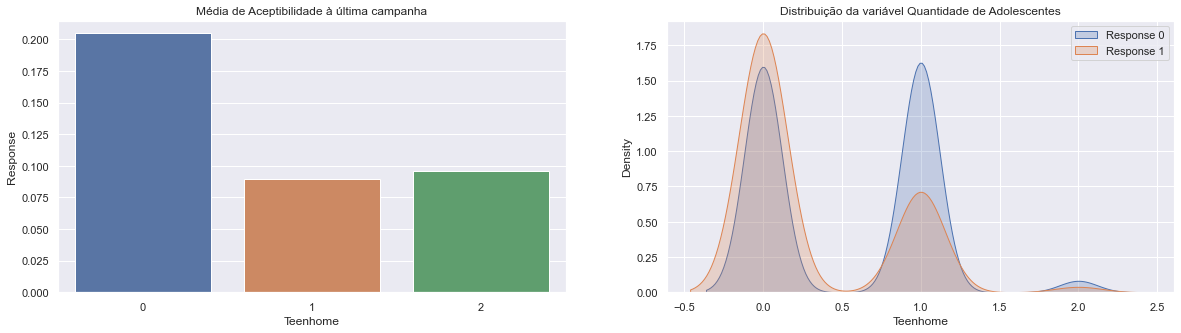

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Teenhome').Response.mean().index,y=data.groupby('Teenhome').Response.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('Response');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].Teenhome,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].Teenhome,label='Response 1',shade=True);
plt.title('Distribuição da variável Quantidade de Adolescentes')
plt.legend();

No gráfico à esquerda, podemos notar a média de aceptibilidade em função da quantidade de adolescentes em casa. No gráfico à direita, notamos a distribuição para a variável `Teenhome`.

Verificamos que:
* Notamos que o grupo que mais aceitou a última campanha foi aquele sem adolescentes em casa.

##### H7. Clientes com reclamações aderem menos a última campanha do que clientes sem reclamações?


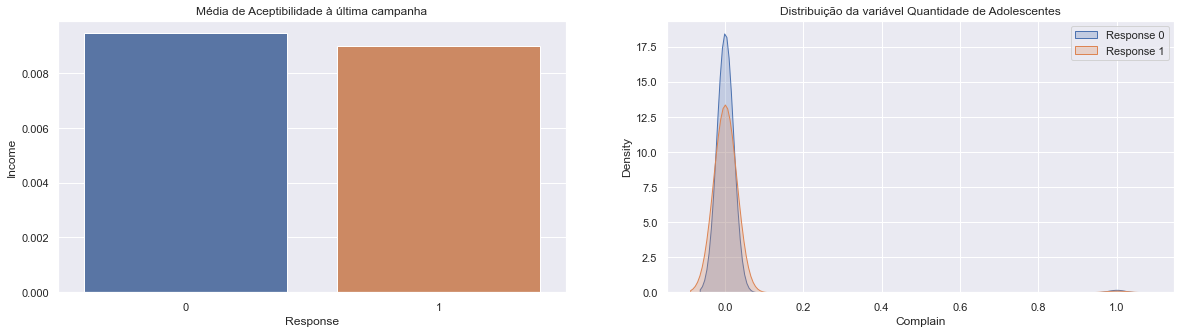

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').Complain.mean().index,y=data.groupby('Response').Complain.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('Complain');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].Complain,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].Complain,label='Response 1',shade=True);
plt.title('Distribuição da variável Reclamações')
plt.legend();

No gráfico à esquerda, podemos notar a média de aceptibilidade em função da quantidade de adolescentes em casa. No gráfico à direita, notamos a distribuição para a variável `Teenhome`.

Verificamos que:
* Notamos que o grupo que mais aceitou a última campanha foi aquele que não realizou reclamações. Entretanto, essa diferença não é tão grande.

##### H8. O estado civil influencia na aceptibilidade à última campanha?

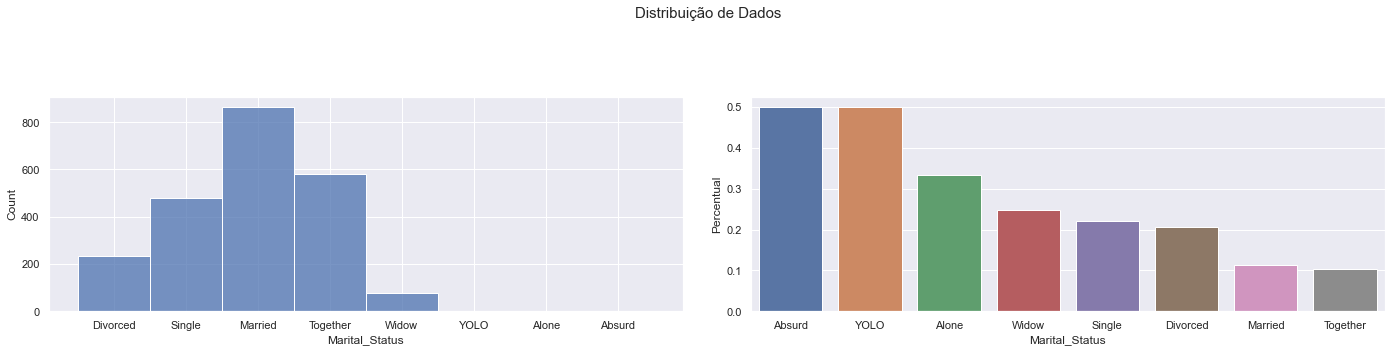

In [26]:
# Gráfico para visualizar a distribuição dos dados para a variável Marital_Status
categorical_distribution_plot(data,'Marital_Status')

No gráfico à esquerda, podemos notar o histograma da variável `Marital_Status` enquanto no gráfico à direita, notamos o percentual de consumidores que aceitaram a oferta na última campanha agrupadas por categoria (Absurd, YOLO, Alone, Widow, Single, Divorced, Married e Together). 

Verificamos que:
* 38,57% dos consumidores são casados;
* 25,89% dos consumidores vivem juntos com seus parceiros;
* 21,43% dos consumidores são solteiros.

Além disso:
* As categorias que apresentaram maior aceitabilidade à última campanha foram: Absurd e YOLO. Essas categorias tiveram o mesmo percentual (50%);
* 33,33% dos consumidores que são solteiros aceitaram à oferta na última campanha;
* 24,68% dos consumidores que são viúvos aceitaram à oferta na última campanha.

### 4.2 Hipóteses Temporais

##### H9. O dia da semana que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?

In [27]:
# Criando um DataFrame temporário para armezenar as informações referente à análise da hipótese 9
df_week = pd.DataFrame(data.groupby('Weekday').Response.mean()).reset_index()

# Definindo ordenador 
sorter = ['Domingo','Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado']
df_week.Weekday = df_week.Weekday.astype("category")
df_week.Weekday = df_week.Weekday.cat.set_categories(sorter)

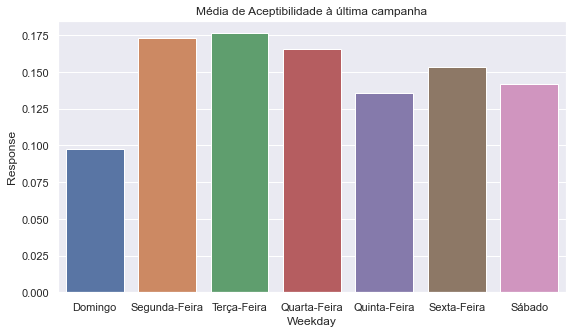

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
# DataFrame ordenado corretamente em função do ordenador df_week.sort_values(["Weekday"])
sns.barplot(x=df_week.sort_values(["Weekday"]).Weekday,y=df_week.sort_values(["Weekday"]).Response);
plt.title('Média de Aceptibilidade à última campanha');

No gráfico acima, podemos notar a média de aceptibilidade em função do dia da semana em que o cliente se vinculou a empresa. 

Verificamos que:
* Segunda, terça e quarta-feira foram os dias da semana que geraram maior conversão em aceitabilidade à última campanha.

##### H10. O mês que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?


In [29]:
df_month = pd.DataFrame(data.groupby('Month').Response.mean()).reset_index()

# Definindo ordenador 
sorter = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_month.Month = df_month.Month.astype("category")
df_month.Month = df_month.Month.cat.set_categories(sorter)

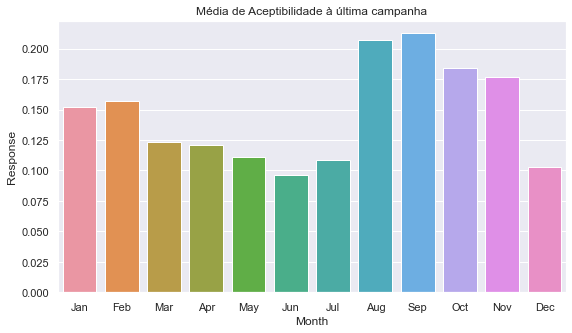

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
# DataFrame ordenado corretamente em função do ordenador df_month.sort_values(["Month"])
sns.barplot(x=df_month.sort_values(["Month"]).Month,y=df_month.sort_values(["Month"]).Response);
plt.title('Média de Aceptibilidade à última campanha');

No gráfico acima, podemos notar a média de aceptibilidade em função do mês em que o cliente se vinculou a empresa. 

Verificamos que:
* Após Fevereiro, há uma redução na conversão de clientes, após Julho há um grande aumento no percentual de conversões atingindo os 4 maiores percentuais do ano (Agosto, Setembro, Outubro e Novembro) reduzindo bastante no mês de dezembro.

##### H11. O ano que o cliente se vinculou à empresa possui alguma relação com a aceptibilidade à última campanha?

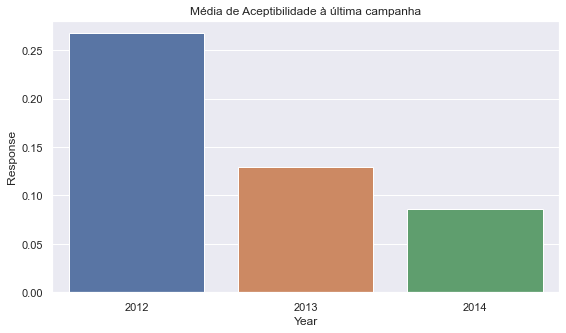

In [31]:
df_year = pd.DataFrame(data.groupby('Year').Response.mean()).reset_index()
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
# DataFrame ordenado corretamente em função do ordenador df_year.sort_values(["Year"])
sns.barplot(x=df_year.sort_values(["Year"]).Year,y=df_year.sort_values(["Year"]).Response);
plt.title('Média de Aceptibilidade à última campanha');

No gráfico acima, podemos notar a média de aceptibilidade em função do ano em que o cliente se vinculou a empresa. 

Verificamos que:
* O maior percentual de conversão de clientes para a última campanha foi maior no grupo de clientes que se vincularam em 2012. Além disso, notamos a redução do percentual de conversão à medida que os anos foram passando. Indicando uma possível tendência de que clientes mais antigos são mais propensos a aceitarem a última campanha.

### 4.3 Hipóteses Lojas

##### H12. O número de visitantes no site da empresa no mês passado influencia a adesão à última campanha?


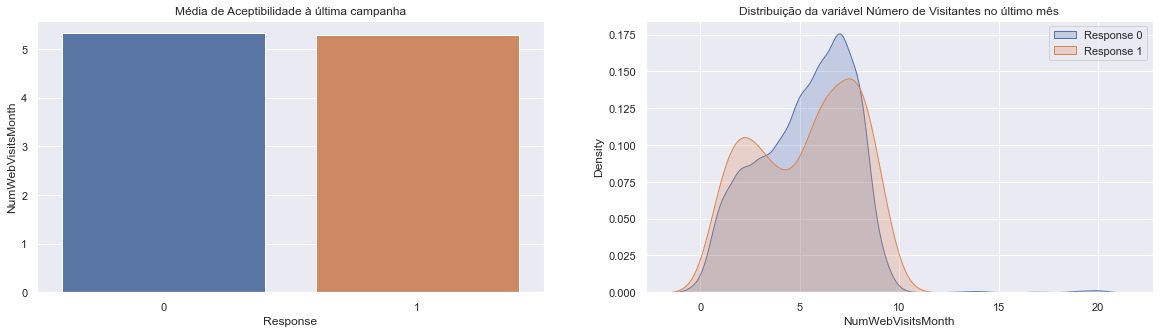

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').NumWebVisitsMonth.mean().index,y=data.groupby('Response').NumWebVisitsMonth.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('NumWebVisitsMonth');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].NumWebVisitsMonth,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].NumWebVisitsMonth,label='Response 1',shade=True);
plt.title('Distribuição da variável Número de Visitantes no último mês')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de visitantes no último mês (`NumWebVisitsMonth`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `NumWebVisitsMonth`.

Verificamos que:
* Aparentemente o número de visitantes no último mês não influenciou na adesão à última campanha.

##### H13. O número de compras feitas diretamente na loja influencia a adesão à última campanha?


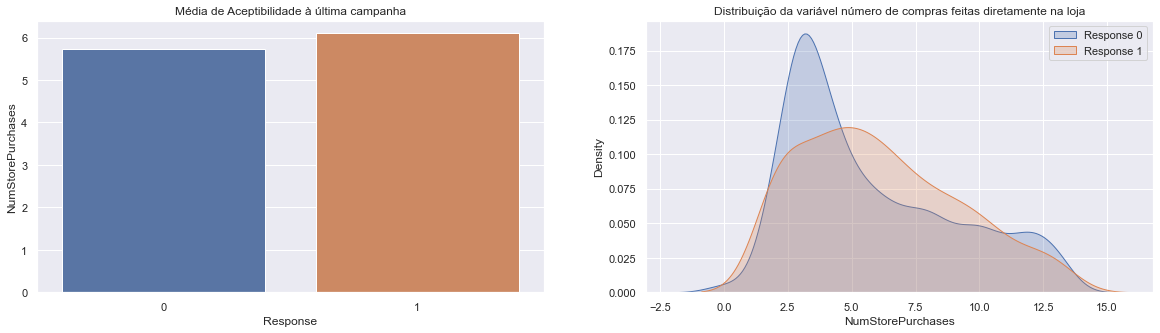

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').NumStorePurchases.mean().index,y=data.groupby('Response').NumStorePurchases.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('NumStorePurchases');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].NumStorePurchases,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].NumStorePurchases,label='Response 1',shade=True);
plt.title('Distribuição da variável número de compras feitas diretamente na loja')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`NumStorePurchases`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `NumStorePurchases`.

Verificamos que:
* Observamos uma tendência de maior número de compras feitas diretamente na loja para o grupo que aceitou a ùltima campanha.

##### H14. O número de compras feitas com desconto influencia a adesão à última campanha?


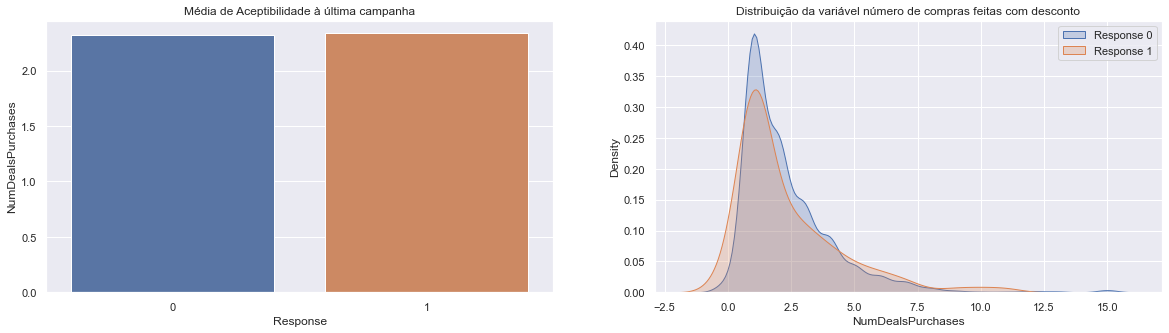

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').NumDealsPurchases.mean().index,y=data.groupby('Response').NumDealsPurchases.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('NumDealsPurchases');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].NumDealsPurchases,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].NumDealsPurchases,label='Response 1',shade=True);
plt.title('Distribuição da variável número de compras feitas com desconto')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`NumDealsPurchases`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `NumDealsPurchases`.

Verificamos que:
* Aparentemente o número de compras feitas com desconto não influenciou na adesão à última campanha.

##### H15. A quantidade de compras feitas utilizando o cardápio influencia a adesão à última campanha?


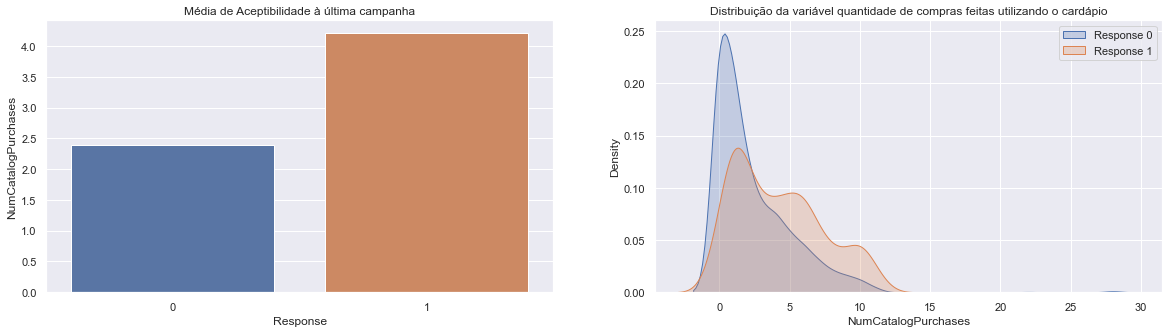

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').NumCatalogPurchases.mean().index,y=data.groupby('Response').NumCatalogPurchases.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('NumCatalogPurchases');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].NumCatalogPurchases,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].NumCatalogPurchases,label='Response 1',shade=True);
plt.title('Distribuição da variável quantidade de compras feitas utilizando o cardápio')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`NumStorePurchases`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `NumStorePurchases`.

Verificamos que:
* Observamos uma tendência de maior número de compras feitas diretamente na loja para o grupo que aceitou a ùltima campanha.

##### H16. A adesão à campanha 1 deveria impactar o aumento na adesão à última campanha; 


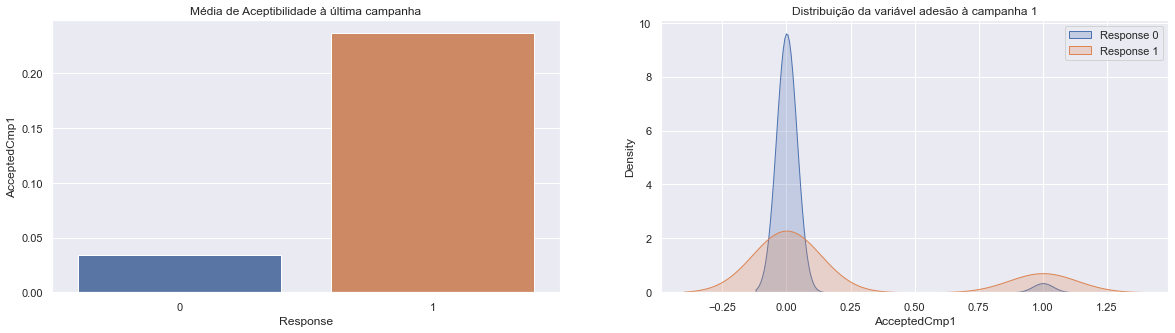

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').AcceptedCmp1.mean().index,y=data.groupby('Response').AcceptedCmp1.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('AcceptedCmp1');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].AcceptedCmp1,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].AcceptedCmp1,label='Response 1',shade=True);
plt.title('Distribuição da variável adesão à campanha 1')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`AcceptedCmp1`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `AcceptedCmp1`.

Verificamos que:
* Observamos uma tendência de maior número de adesão à primeira campanha para o grupo que aceitou a ùltima campanha.

##### H17. A adesão à campanha 2 deveria impactar o aumento na adesão à última campanha; 


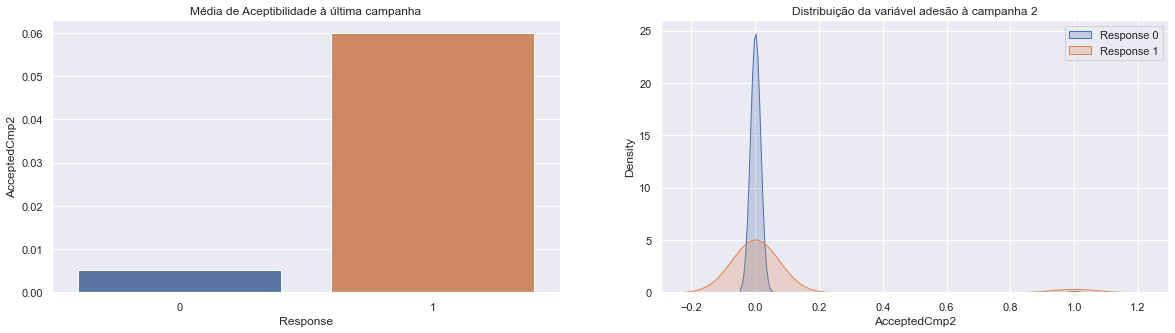

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').AcceptedCmp2.mean().index,y=data.groupby('Response').AcceptedCmp2.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('AcceptedCmp2');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].AcceptedCmp2,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].AcceptedCmp2,label='Response 1',shade=True);
plt.title('Distribuição da variável adesão à campanha 2')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`AcceptedCmp2`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `AcceptedCmp2`.

Verificamos que:
* Observamos uma tendência de maior número de adesão à segunda campanha para o grupo que aceitou a ùltima campanha.

##### H18. A adesão à campanha 3 deveria impactar o aumento na adesão à última campanha; 


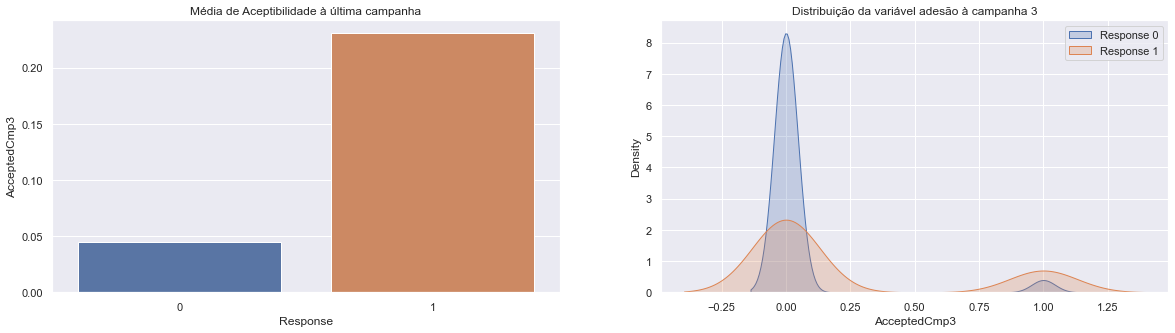

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').AcceptedCmp3.mean().index,y=data.groupby('Response').AcceptedCmp3.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('AcceptedCmp3');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].AcceptedCmp3,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].AcceptedCmp3,label='Response 1',shade=True);
plt.title('Distribuição da variável adesão à campanha 3')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`AcceptedCmp3`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `AcceptedCmp3`.

Verificamos que:
* Observamos uma tendência de maior número de adesão à terceira campanha para o grupo que aceitou a ùltima campanha.

##### H19. A adesão à campanha 4 deveria impactar o aumento na adesão à última campanha; 


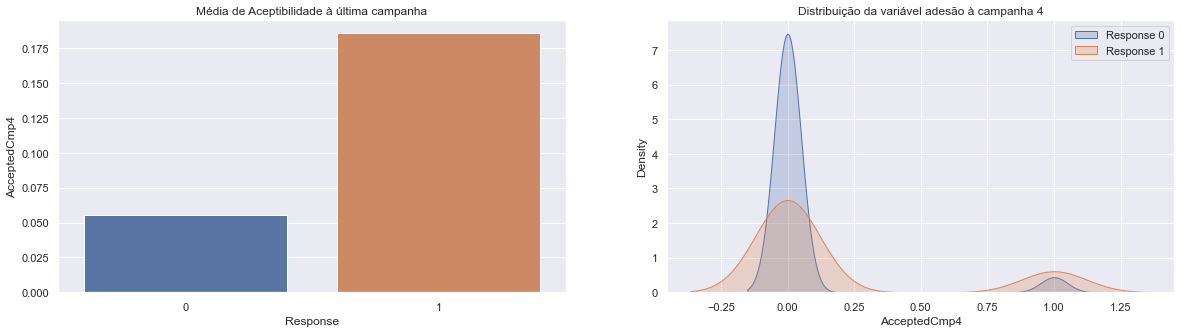

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').AcceptedCmp4.mean().index,y=data.groupby('Response').AcceptedCmp4.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('AcceptedCmp4');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].AcceptedCmp4,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].AcceptedCmp4,label='Response 1',shade=True);
plt.title('Distribuição da variável adesão à campanha 4')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`AcceptedCmp4`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `AcceptedCmp4`.

Verificamos que:
* Observamos uma tendência de maior número de adesão à quarta campanha para o grupo que aceitou a ùltima campanha.

##### H20. A adesão à campanha 5 deveria impactar o aumento na adesão à última campanha; 

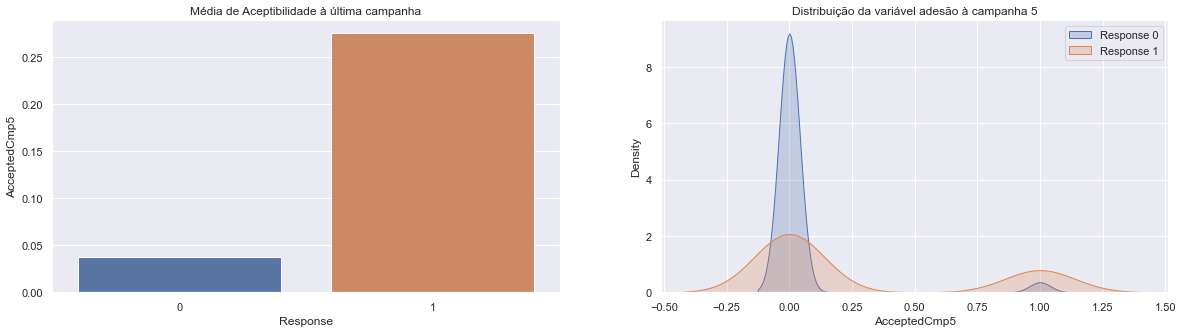

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').AcceptedCmp5.mean().index,y=data.groupby('Response').AcceptedCmp5.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('AcceptedCmp5');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].AcceptedCmp5,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].AcceptedCmp5,label='Response 1',shade=True);
plt.title('Distribuição da variável adesão à campanha 5')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`AcceptedCmp5`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `AcceptedCmp5`.

Verificamos que:
* Observamos uma tendência de maior número de adesão à quinta campanha para o grupo que aceitou a ùltima campanha.

### 4.4 Hipóteses Localização

##### H21. Algum dos países teve melhor receptibilidade à última campanha do que os demais?


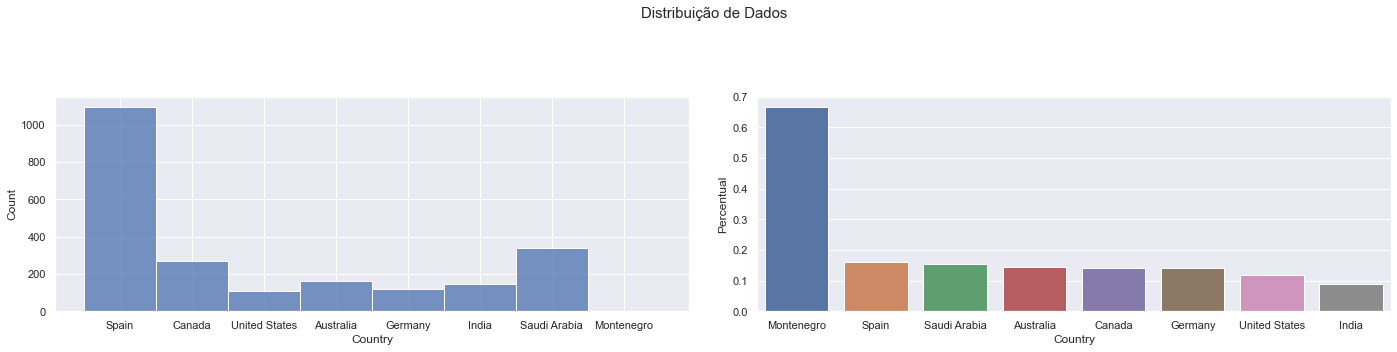

In [41]:
# Gráfico para visualizar a distribuição dos dados para a variável Country
categorical_distribution_plot(data,'Country')

No gráfico à esquerda, podemos notar o histograma da variável `Country` enquanto no gráfico à direita, notamos o percentual de consumidores que aceitaram a oferta na última campanha agrupadas por categoria (ME, SP, SA, AUS, CA, GER, US e IND). 

Verificamos que:
* 38,57% dos consumidores são casados;
* 25,89% dos consumidores vivem juntos com seus parceiros;
* 21,43% dos consumidores são solteiros.

Além disso:
* O país que apresentou disparadamente maior aceitabilidade à última campanha foi: ME. 66,67% dos consumidores pertencentes a ME (Montenegro) aderiram a esta campanha;
* 16,07% dos consumidores pertencentes à SP (Espanha) aceitaram à oferta na última campanha;
* 15,43% dos consumidores pertencentes à SA (Árabia Saudita) aceitaram à oferta na última campanha.

##### H22. Algum continente teve melhor receptibilidade à última campanha do que os demais?

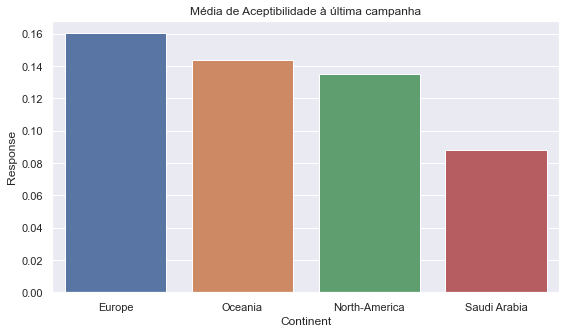

In [42]:
df_continent = pd.DataFrame(data.groupby('Continent').Response.mean()).reset_index().sort_values(by='Response',ascending=False)
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=df_continent.Continent,y=df_continent.Response);
plt.title('Média de Aceptibilidade à última campanha');

No gráfico acima, podemos notar a média de aceptibilidade em função do continente do cliente. 

Verificamos que:
* O maior percentual de conversão de clientes para a última campanha foi maior continente europeu.

### 4.5 Hipóteses Produtos

##### H23. A quantidade gasta em frutas influencia na aceptibilidade à última campanha?

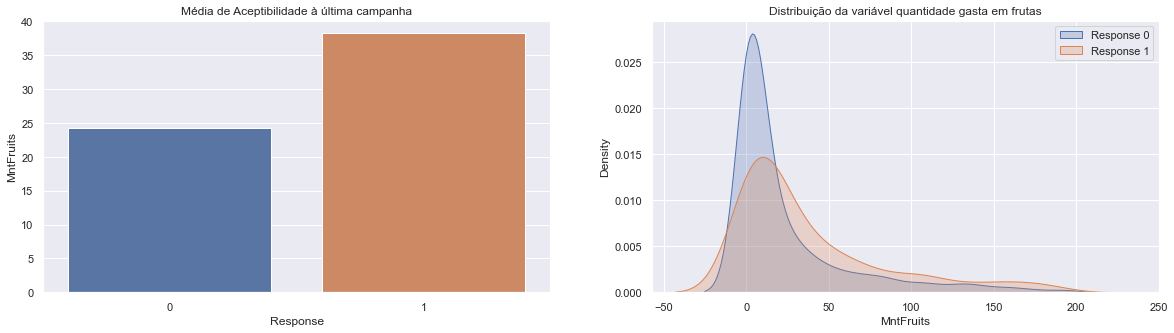

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').MntFruits.mean().index,y=data.groupby('Response').MntFruits.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('MntFruits');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].MntFruits,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].MntFruits,label='Response 1',shade=True);
plt.title('Distribuição da variável quantidade gasta em frutas')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`MntFruits`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `MntFruits`.

Verificamos que:
* Observamos uma tendência de o grupo que aceitou à última campanha tende a consumir mais frutas.

##### H24. A quantidade gasta em produtos de carne influencia na aceptibilidade à última campanha?


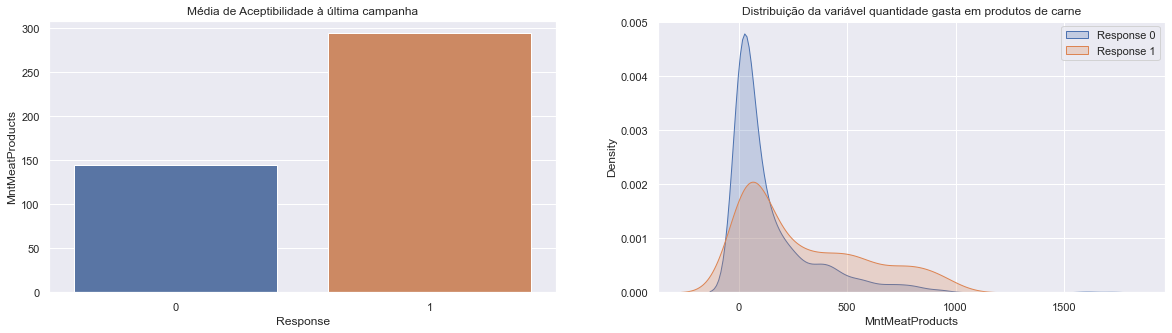

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').MntMeatProducts.mean().index,y=data.groupby('Response').MntMeatProducts.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('MntMeatProducts');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].MntMeatProducts,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].MntMeatProducts,label='Response 1',shade=True);
plt.title('Distribuição da variável quantidade gasta em produtos de carne')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`MntMeatProducts`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `MntMeatProducts`.

Verificamos que:
* Observamos uma tendência de o grupo que aceitou à última campanha tende a consumir mais carnes.

##### H25. A quantidade gasta em produtos pescados influencia na aceptibilidade à última campanha?


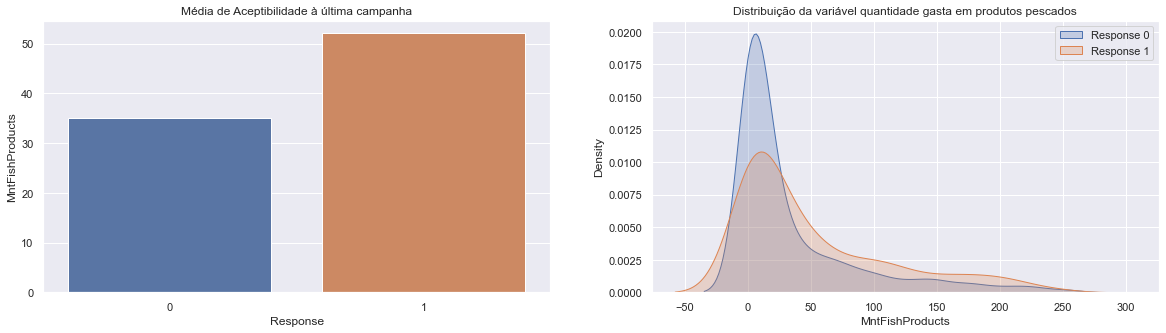

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').MntFishProducts.mean().index,y=data.groupby('Response').MntFishProducts.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('MntFishProducts');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].MntFishProducts,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].MntFishProducts,label='Response 1',shade=True);
plt.title('Distribuição da variável quantidade gasta em produtos pescados')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`MntFishProducts`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `MntFishProducts`.

Verificamos que:
* Observamos uma tendência de o grupo que aceitou à última campanha tende a consumir mais pescados.

##### H26. A quantidade gasta em produtos doces influencia na aceptibilidade à última campanha?


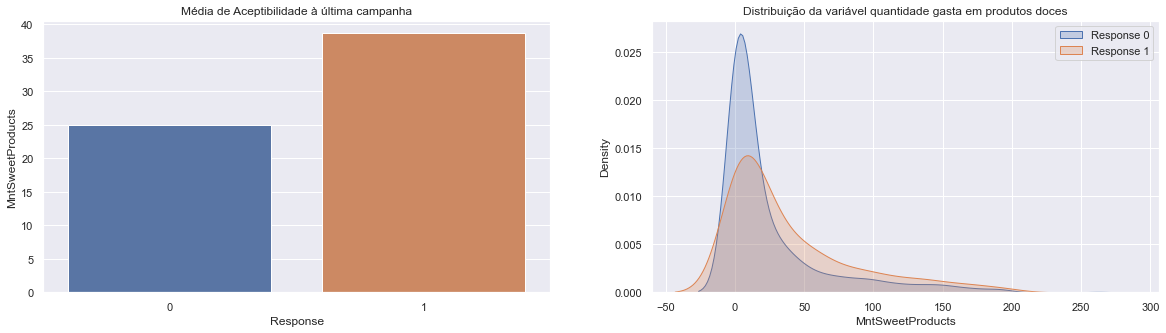

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').MntSweetProducts.mean().index,y=data.groupby('Response').MntSweetProducts.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('MntSweetProducts');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].MntSweetProducts,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].MntSweetProducts,label='Response 1',shade=True);
plt.title('Distribuição da variável quantidade gasta em produtos doces')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`MntSweetProducts`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `MntSweetProducts`.

Verificamos que:
* Observamos uma tendência de o grupo que aceitou à última campanha tende a consumir mais doces.

##### H27. A quantidade gasta em vinhos influencia na aceptibilidade à última campanha?


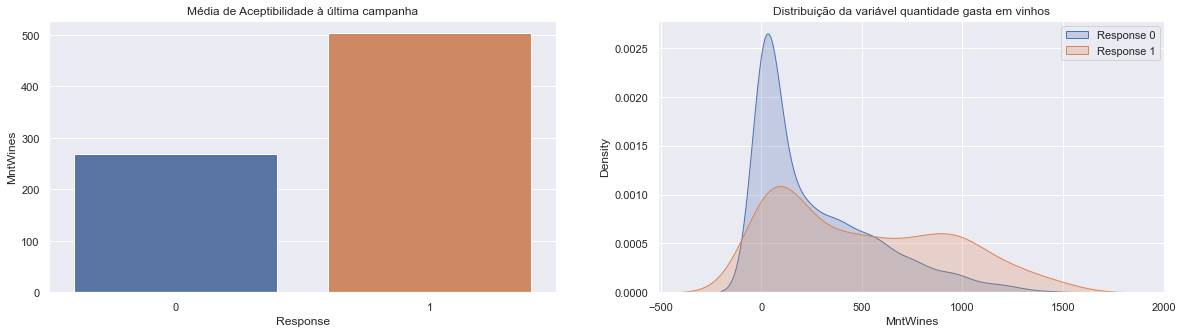

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').MntWines.mean().index,y=data.groupby('Response').MntWines.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('MntWines');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].MntWines,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].MntWines,label='Response 1',shade=True);
plt.title('Distribuição da variável quantidade gasta em vinhos')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`MntWines`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `MntWines`.

Verificamos que:
* Observamos uma tendência de o grupo que aceitou à última campanha tende a consumir mais vinhos.

##### H28. A quantidade gasta em produtos de ouro influencia na aceptibilidade à última campanha?

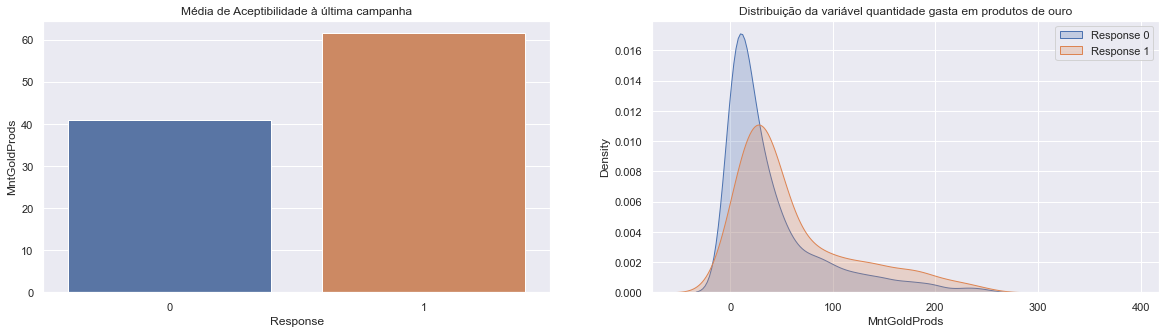

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x=data.groupby('Response').MntGoldProds.mean().index,y=data.groupby('Response').MntGoldProds.mean().values);
plt.title('Média de Aceptibilidade à última campanha');
plt.ylabel('MntGoldProds');

plt.subplot(1, 2, 2)
sns.kdeplot(data[data.Response == 0].MntGoldProds,label='Response 0',shade=True);
sns.kdeplot(data[data.Response == 1].MntGoldProds,label='Response 1',shade=True);
plt.title('Distribuição da variável quantidade gasta em produtos de ouro')
plt.legend();

No gráfico à esquerda, podemos notar a média do número de compras feitas diretamente na loja (`MntGoldProds`) em função da variável `Response`. No gráfico à direita, notamos a distribuição para a variável `MntGoldProds`.

Verificamos que:
* Observamos uma tendência de o grupo que aceitou à última campanha tende a consumir mais produtos de ouro.

## Considerações Finais

Através desta análise de dados podemos chegar as seguintes conclusões a respeito do perfil de cliente que mais teve adesão à última campanha:
* Possuiam PhD ou mestrado;
* Haviam comprado recentemente;
* Não tinham crianças ou adolescentes em casa;
* Tinham renda mais elevada;
* Não possuem reclamações;
* Têm estado civil: absurd, yolo ou alone;
* Se vincularam à empresa em uma segunda-feira, terça-feira ou quarta-feira;
* Se vincularam à empresa em agosto, setembro, outubro ou novembro;
* Têm mais tempo de vínculo com a empresa (a adesão foi menor para clientes com menor quantidade de anos de vínculo);
* Realizaram mais compras diretamente na loja;
* Fizeram mais compras utilizando cardápio;
* Aceitaram as demais campanhas (Campanha 1, Campanha 2, Campanha 3, Campanha 4, Campanha 5);
* São pertencentes ao continente europeu (Montenegro se destacou bastante dentre os europeus);
* Possuem maiores gastos em todos os setores avaliados: frutas, carnes, pescados, doces, vinhos, produtos de ouro.